In [1]:
import os
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.metrics import AUC, Precision, Recall
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_recall_curve, roc_auc_score
from tensorflow.keras.metrics import AUC, Precision, Recall
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import load_model
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, precision_recall_curve, precision_score, recall_score

import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [ ]:
# import os
# import numpy as np
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Data Enhancement Configuration
# datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=10,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.1,
#     horizontal_flip=True,
#     vertical_flip=True,
#     fill_mode='reflect'
# )

# def augment_images(data_dir, class_name, augmented_dir, target_count):

#     save_class_dir = os.path.join(augmented_dir, class_name)
#     if not os.path.exists(save_class_dir):
#         os.makedirs(save_class_dir)

#     current_count = len(os.listdir(os.path.join(data_dir, class_name)))
#     additional_count = target_count - current_count
#     print(f"类别 '{class_name}' 当前有 {current_count} 张图像, 需要增加 {additional_count} 张图像。")
    
#     if additional_count <= 0:
#         print(f"类别 '{class_name}' 已经达到或超过目标数量。")
#         return

#     # Generate data-enhanced images
#     generator = datagen.flow_from_directory(
#         directory=data_dir,
#         classes=[class_name],
#         target_size=(256, 256),
#         batch_size=32,
#         class_mode='categorical',
#         save_to_dir=save_class_dir,
#         save_prefix='aug_',
#         save_format='png',
#         color_mode='rgb'  
#     )
    
#     num_batches = int(np.ceil(additional_count / generator.batch_size))
    
#     for i in range(num_batches):
#         images, _ = next(generator)
#         # If a sufficient number of images have been generated, exit the loop
#         if len(os.listdir(save_class_dir)) >= target_count:
#             break
#     print(f"类别 '{class_name}' 图像增强完成。")

# # Original dataset directory
# original_dataset_dir = r'C:\Users\FOMO\Desktop\MV\202018010315_MV_Coursework\images\wheat_leaf'
# # Enhanced dataset directory
# augmented_dataset_dir = r'C:\Users\FOMO\Desktop\MV\202018010315_MV_Coursework\images\augmented_dataset'
# if not os.path.exists(augmented_dataset_dir):
#     os.makedirs(augmented_dataset_dir)

# # Data enhancement for each category separately
# for class_name in ['healthy', 'unhealthy']:
#     augment_images(original_dataset_dir, class_name, augmented_dataset_dir, 2000)

# print("所有类别的图像增强完成。")

In [ ]:
# import os
# import shutil
# import numpy as np
# import matplotlib.pyplot as plt

# def split_dataset(original_dir, target_dir, train_ratio=0.85, val_ratio=0.1):
#     if not os.path.exists(target_dir):
#         os.makedirs(target_dir)
#         os.makedirs(os.path.join(target_dir, 'train'))
#         os.makedirs(os.path.join(target_dir, 'validation'))
#         os.makedirs(os.path.join(target_dir, 'test'))

#     classes = [d for d in os.listdir(original_dir) if os.path.isdir(os.path.join(original_dir, d))]

#     for cls in classes:
#         os.makedirs(os.path.join(target_dir, 'train', cls), exist_ok=True)
#         os.makedirs(os.path.join(target_dir, 'validation', cls), exist_ok=True)
#         os.makedirs(os.path.join(target_dir, 'test', cls), exist_ok=True)

#         all_images = os.listdir(os.path.join(original_dir, cls))
#         np.random.shuffle(all_images)

#         train_end = int(len(all_images) * train_ratio)
#         val_end = train_end + int(len(all_images) * val_ratio)

#         for i, img in enumerate(all_images):
#             if i < train_end:
#                 subset = 'train'
#             elif i < val_end:
#                 subset = 'validation'
#             else:
#                 subset = 'test'

#             src = os.path.join(original_dir, cls, img)
#             dst = os.path.join(target_dir, subset, cls, img)
#             shutil.copy(src, dst)

# def count_images_in_subfolders(directory):
#     counts = {}
#     for subset in ['train', 'validation', 'test']:
#         subset_path = os.path.join(directory, subset)
#         for cls in os.listdir(subset_path):
#             class_path = os.path.join(subset_path, cls)
#             if os.path.isdir(class_path):
#                 count = len(os.listdir(class_path))
#                 counts[f"{subset}/{cls}"] = count
#     return counts

# def visualize_data_split(train_dir, validation_dir, test_dir):
#     categories = set()
#     data = {'train': {}, 'validation': {}, 'test': {}}

#     for dataset, directory in zip(['train', 'validation', 'test'], [train_dir, validation_dir, test_dir]):
#         for category in os.listdir(directory):
#             category_path = os.path.join(directory, category)
#             if os.path.isdir(category_path):
#                 categories.add(category)
#                 data[dataset][category] = len(os.listdir(category_path))

#     categories = sorted(list(categories))
    
#     train_counts = [data['train'].get(category, 0) for category in categories]
#     val_counts = [data['validation'].get(category, 0) for category in categories]
#     test_counts = [data['test'].get(category, 0) for category in categories]

#     bar_width = 0.35
#     index = np.arange(len(categories))

#     plt.figure(figsize=(10, 6))

#     plt.bar(index, train_counts, bar_width, label='Train', color='b')
#     plt.bar(index, val_counts, bar_width, bottom=train_counts, label='Validation', color='r')
#     plt.bar(index, test_counts, bar_width, bottom=np.array(train_counts) + np.array(val_counts), label='Test', color='g')

#     plt.xlabel('Category')
#     plt.ylabel('Number of Images')
#     plt.title('Number of Images per Category Across Datasets')
#     plt.xticks(index, categories)
#     plt.legend()

#     plt.tight_layout()
#     plt.show()

# augmented_dataset_dir = r'C:\Users\FOMO\Desktop\MV\202018010315_MV_Coursework\images\augmented_dataset'
# splited_dataset_dir = r"C:\Users\FOMO\Desktop\MV\202018010315_MV_Coursework\images\splited_dataset"

# split_dataset(augmented_dataset_dir, splited_dataset_dir)

# counts = count_images_in_subfolders(splited_dataset_dir)
# for key, count in counts.items():
#     print(f"{key}: {count} images")

# train_dir = os.path.join(splited_dataset_dir, 'train')
# validation_dir = os.path.join(splited_dataset_dir, 'validation')
# test_dir = os.path.join(splited_dataset_dir, 'test')

# visualize_data_split(train_dir, validation_dir, test_dir)

Found 4013 images belonging to 2 classes.
Found 1090 images belonging to 2 classes.
Found 580 images belonging to 2 classes.


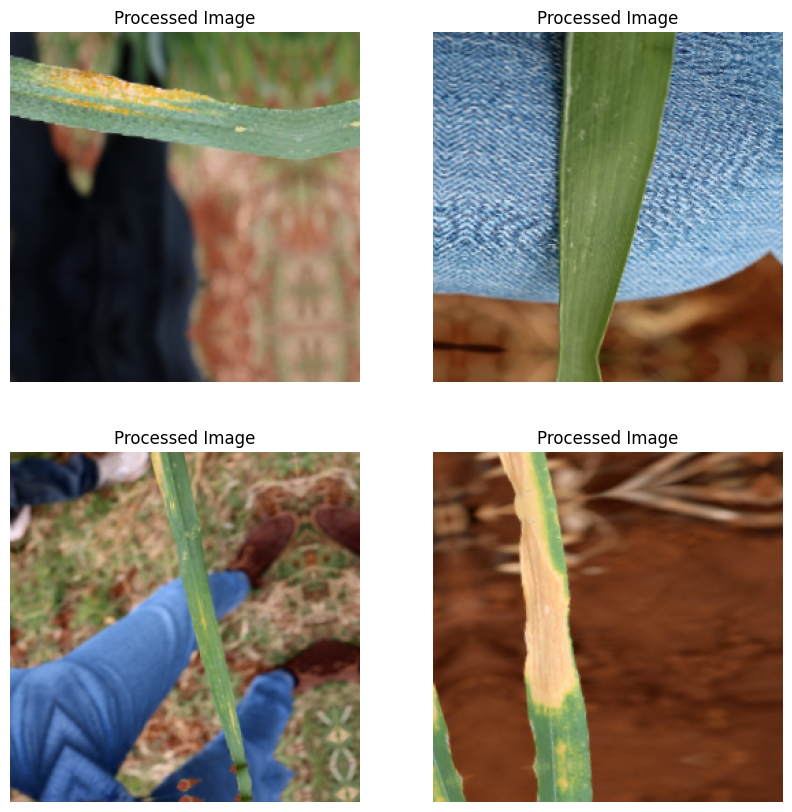

In [2]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

def preprocess_wheat_leaves_data():
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,  # Wheat leaves can appear in any direction
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.1,
        shear_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,  # Up and down turning of wheat leaves
        fill_mode='reflect'  # Use reflection
    )
    val_test_datagen = ImageDataGenerator(
        rescale=1./255,
    )
    return train_datagen, val_test_datagen

# Create a function to save an image to a specified directory
def load_wheat_leaves_datasets(train_datagen, val_test_datagen, batch_size=32, target_size=(256,256)):
    train_dir = r"C:\Users\FOMO\Desktop\MV\202018010315_MV_Coursework\images\splited_dataset\train"
    val_dir = r"C:\Users\FOMO\Desktop\MV\202018010315_MV_Coursework\images\splited_dataset\validation"
    test_dir = r"C:\Users\FOMO\Desktop\MV\202018010315_MV_Coursework\images\splited_dataset\test"

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical', 
        color_mode='rgb'
    )

    validation_generator = val_test_datagen.flow_from_directory(
        val_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        color_mode='rgb'
    )

    test_generator = val_test_datagen.flow_from_directory(
        test_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        color_mode='rgb'
    )

    return train_generator, validation_generator, test_generator

train_datagen, val_test_datagen = preprocess_wheat_leaves_data()
train_generator, validation_generator, test_generator = load_wheat_leaves_datasets(train_datagen, val_test_datagen)

# Extract a batch of images and labels from train_generator
batch_images, batch_labels = next(train_generator)

# Setting the number of images to visualize
num_images = 4

plt.figure(figsize=(10, 10))

for i in range(num_images):
    plt.subplot(2, 2, i + 1)
    plt.imshow(batch_images[i])
    plt.title('Processed Image')
    plt.axis('off')

plt.show()


In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models

def resnet_block(input_tensor, filters, kernel_size=3, stride=2, conv_shortcut=True):
    x = layers.Conv2D(filters, kernel_size, strides=stride, padding="same")(input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(filters, kernel_size, padding="same")(x)
    x = layers.BatchNormalization()(x)

    if conv_shortcut:
        shortcut = layers.Conv2D(filters, 1, strides=stride, padding="same")(input_tensor)
        shortcut = layers.BatchNormalization()(shortcut)
    else:
        shortcut = input_tensor

    x = layers.add([x, shortcut])
    x = layers.Activation("relu")(x)
    return x

def inception_block(input_tensor, filters):
    branch1 = layers.Conv2D(filters, (1, 1), padding='same', activation='relu')(input_tensor)

    branch2 = layers.Conv2D(filters, (3, 3), padding='same', activation='relu')(input_tensor)

    branch3 = layers.Conv2D(filters, (5, 5), padding='same', activation='relu')(input_tensor)

    branch4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(input_tensor)
    branch4 = layers.Conv2D(filters, (1, 1), padding='same', activation='relu')(branch4)

    output = layers.concatenate([branch1, branch2, branch3, branch4], axis=-1)
    return output

def spatial_attention(input_tensor):
    kernel_size = 7
    avg_pool = layers.Lambda(lambda x: tf.reduce_mean(x, axis=-1, keepdims=True))(input_tensor)
    max_pool = layers.Lambda(lambda x: tf.reduce_max(x, axis=-1, keepdims=True))(input_tensor)
    concat = layers.concatenate([avg_pool, max_pool], axis=-1)
    attention = layers.Conv2D(1, kernel_size, padding='same', activation='sigmoid')(concat)
    return layers.multiply([input_tensor, attention])

def create_custom_model(input_shape):
    inputs = layers.Input(shape=input_shape)

    # ResNet and Inception Modules
    x = resnet_block(inputs, 64)
    x = resnet_block(x, 32)
    x = resnet_block(x, 32)
    # Spatial attention mechanisms
    x = spatial_attention(x)

    x = inception_block(x, 32)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = inception_block(x, 32)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = inception_block(x, 32)
    # Spatial attention mechanisms
    x = spatial_attention(x)
    # Global average pooling and output layer
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.5)(x)  # Add dropout
    outputs = layers.Dense(2, activation='softmax')(x) 

    model = models.Model(inputs=inputs, outputs=outputs)
    return model

In [10]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Creating Model
model = create_custom_model((256,256, 3))  # Input Size
model.summary()

# Compile Model
learning_rate = 0.001  # Initial learning rate
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy',Precision(name='precision'), Recall(name='recall')]
)

# Creating Callback Functions
early_stopping = EarlyStopping(monitor='val_loss', patience=10)  # Stop training when val_loss doesn't improve for 10 epochs
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)  # When val_loss does not improve in 5 epochs, the learning rate is reduced to 20% of the original, down to 0.0001

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_121 (Conv2D)            (None, 128, 128, 64  1792        ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_107 (Batch  (None, 128, 128, 64  256        ['conv2d_121[0][0]']             
 Normalization)                 )                                                           

In [5]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

def build_resnet50_model(input_shape, num_classes):
    # 加载预训练的 ResNet50 模型，不包括顶部的全连接层
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

    # 冻结基础模型的层
    base_model.trainable = False

    # 创建模型
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(1024, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])

    # 编译模型
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy',Precision(name='precision'), Recall(name='recall')])

    return model

# 示例：创建一个模型
input_shape = (256, 256, 3)
num_classes = 2
model_resnet50 = build_resnet50_model(input_shape, num_classes)
model_resnet50.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_2 (Dense)             (None, 2)                 2050      
                                                                 
Total params: 25,687,938
Trainable params: 2,100,226
Non-trainable params: 23,587,712
_________________________________________________________________


In [6]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def build_inceptionv3_model(input_shape, num_classes):
    # 创建输入层
    inputs = Input(shape=input_shape)

    # 加载预训练的 InceptionV3 模型
    base_model = InceptionV3(weights='imagenet', include_top=False, input_tensor=inputs)

    # 冻结基础模型的层
    base_model.trainable = False

    # 创建模型
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    # 构建最终模型
    model = Model(inputs=inputs, outputs=predictions)

    # 编译模型
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy',Precision(name='precision'), Recall(name='recall')])

    return model

# 示例：创建一个模型
input_shape = (256, 256, 3)
num_classes = 2
model_inceptionv3 = build_inceptionv3_model(input_shape, num_classes)
model_inceptionv3.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_23 (Conv2D)             (None, 127, 127, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_9 (BatchNo  (None, 127, 127, 32  96         ['conv2d_23[0][0]']              
 rmalization)                   )                                                           

In [7]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def build_vgg19_model(input_shape, num_classes):
    # 创建输入层
    inputs = Input(shape=input_shape)

    # 加载预训练的 VGG19 模型
    base_model = VGG19(weights='imagenet', include_top=False, input_tensor=inputs)

    # 冻结基础模型的层
    base_model.trainable = False

    # 创建模型
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    # 构建最终模型
    model = Model(inputs=inputs, outputs=predictions)

    # 编译模型
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy',Precision(name='precision'), Recall(name='recall')])

    return model

# 示例：创建一个模型
input_shape = (256, 256, 3)
num_classes = 2
model_vgg19 = build_vgg19_model(input_shape, num_classes)
model_vgg19.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0   

In [8]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def build_xception_model(input_shape, num_classes):
    # 创建输入层
    inputs = Input(shape=input_shape)

    # 加载预训练的 Xception 模型
    base_model = Xception(weights='imagenet', include_top=False, input_tensor=inputs)

    # 冻结基础模型的层
    base_model.trainable = False

    # 创建模型
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    # 构建最终模型
    model = Model(inputs=inputs, outputs=predictions)

    # 编译模型
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy',Precision(name='precision'), Recall(name='recall')])

    return model

# 示例：创建一个模型
input_shape = (256, 256, 3)
num_classes = 2
model_xception = build_xception_model(input_shape, num_classes)
model_xception.summary()


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 127, 127, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 127, 127, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                           

In [11]:
epochs = 40
history_model = model.fit(train_generator, validation_data=validation_generator, epochs=epochs, callbacks=[early_stopping, reduce_lr])
model.save('ComparisonwithPre-trainedModels/model_custom.h5')

Epoch 1/40
126/126 [==============================] - 56s 429ms/step - loss: 0.3379 - accuracy: 0.8580 - precision: 0.8580 - recall: 0.8580 - val_loss: 0.6417 - val_accuracy: 0.6945 - val_precision: 0.6945 - val_recall: 0.6945 - lr: 0.0010
Epoch 2/40
126/126 [==============================] - 53s 421ms/step - loss: 0.1605 - accuracy: 0.9370 - precision: 0.9370 - recall: 0.9370 - val_loss: 0.7309 - val_accuracy: 0.6064 - val_precision: 0.6064 - val_recall: 0.6064 - lr: 0.0010
Epoch 3/40
126/126 [==============================] - 53s 423ms/step - loss: 0.1349 - accuracy: 0.9551 - precision: 0.9551 - recall: 0.9551 - val_loss: 0.7414 - val_accuracy: 0.7835 - val_precision: 0.7835 - val_recall: 0.7835 - lr: 0.0010
Epoch 4/40
126/126 [==============================] - 54s 427ms/step - loss: 0.0759 - accuracy: 0.9761 - precision: 0.9761 - recall: 0.9761 - val_loss: 0.8538 - val_accuracy: 0.6459 - val_precision: 0.6459 - val_recall: 0.6459 - lr: 0.0010
Epoch 5/40
126/126 [====================

In [12]:
epochs = 40
history_resnet = model_resnet50.fit(train_generator, validation_data=validation_generator, epochs=epochs, callbacks=[early_stopping, reduce_lr])
model_resnet50.save('ComparisonwithPre-trainedModels/model_resnet50.h5')

Epoch 1/40
126/126 [==============================] - 60s 446ms/step - loss: 0.8086 - accuracy: 0.5198 - precision: 0.5198 - recall: 0.5198 - val_loss: 0.8574 - val_accuracy: 0.5064 - val_precision: 0.5064 - val_recall: 0.5064 - lr: 0.0010
Epoch 2/40
126/126 [==============================] - 54s 426ms/step - loss: 0.7278 - accuracy: 0.5657 - precision: 0.5657 - recall: 0.5657 - val_loss: 0.6512 - val_accuracy: 0.5670 - val_precision: 0.5670 - val_recall: 0.5670 - lr: 0.0010
Epoch 3/40
126/126 [==============================] - 54s 427ms/step - loss: 0.6738 - accuracy: 0.5856 - precision: 0.5856 - recall: 0.5856 - val_loss: 0.6444 - val_accuracy: 0.6000 - val_precision: 0.6000 - val_recall: 0.6000 - lr: 0.0010
Epoch 4/40
126/126 [==============================] - 55s 432ms/step - loss: 0.6782 - accuracy: 0.5781 - precision: 0.5781 - recall: 0.5781 - val_loss: 0.6260 - val_accuracy: 0.6560 - val_precision: 0.6560 - val_recall: 0.6560 - lr: 0.0010
Epoch 5/40
126/126 [====================

In [13]:
epochs = 40
history_inception = model_inceptionv3.fit(train_generator, validation_data=validation_generator, epochs=epochs, callbacks=[early_stopping, reduce_lr])
model_inceptionv3.save('ComparisonwithPre-trainedModels/model_inceptionv3.h5')

Epoch 1/40
126/126 [==============================] - 63s 456ms/step - loss: 0.2527 - accuracy: 0.9088 - precision: 0.9088 - recall: 0.9088 - val_loss: 0.0910 - val_accuracy: 0.9633 - val_precision: 0.9633 - val_recall: 0.9633 - lr: 0.0010
Epoch 2/40
126/126 [==============================] - 54s 431ms/step - loss: 0.1406 - accuracy: 0.9424 - precision: 0.9424 - recall: 0.9424 - val_loss: 0.0863 - val_accuracy: 0.9661 - val_precision: 0.9661 - val_recall: 0.9661 - lr: 0.0010
Epoch 3/40
126/126 [==============================] - 54s 430ms/step - loss: 0.1198 - accuracy: 0.9514 - precision: 0.9514 - recall: 0.9514 - val_loss: 0.0818 - val_accuracy: 0.9651 - val_precision: 0.9651 - val_recall: 0.9651 - lr: 0.0010
Epoch 4/40
126/126 [==============================] - 55s 435ms/step - loss: 0.1002 - accuracy: 0.9614 - precision: 0.9614 - recall: 0.9614 - val_loss: 0.0884 - val_accuracy: 0.9615 - val_precision: 0.9615 - val_recall: 0.9615 - lr: 0.0010
Epoch 5/40
126/126 [====================

In [14]:
epochs = 40
history_vgg19 = model_vgg19.fit(train_generator, validation_data=validation_generator, epochs=epochs, callbacks=[early_stopping, reduce_lr])
model_vgg19.save('ComparisonwithPre-trainedModels/model_vgg19.h5')

Epoch 1/40
126/126 [==============================] - 79s 576ms/step - loss: 0.4148 - accuracy: 0.8121 - precision: 0.8121 - recall: 0.8121 - val_loss: 0.2192 - val_accuracy: 0.9229 - val_precision: 0.9229 - val_recall: 0.9229 - lr: 0.0010
Epoch 2/40
126/126 [==============================] - 67s 530ms/step - loss: 0.2260 - accuracy: 0.9110 - precision: 0.9110 - recall: 0.9110 - val_loss: 0.1519 - val_accuracy: 0.9394 - val_precision: 0.9394 - val_recall: 0.9394 - lr: 0.0010
Epoch 3/40
126/126 [==============================] - 64s 505ms/step - loss: 0.1982 - accuracy: 0.9165 - precision: 0.9165 - recall: 0.9165 - val_loss: 0.1202 - val_accuracy: 0.9550 - val_precision: 0.9550 - val_recall: 0.9550 - lr: 0.0010
Epoch 4/40
126/126 [==============================] - 62s 491ms/step - loss: 0.1897 - accuracy: 0.9198 - precision: 0.9198 - recall: 0.9198 - val_loss: 0.1099 - val_accuracy: 0.9615 - val_precision: 0.9615 - val_recall: 0.9615 - lr: 0.0010
Epoch 5/40
126/126 [====================

In [15]:
epochs = 40
history_xception = model_xception.fit(train_generator, validation_data=validation_generator, epochs=epochs, callbacks=[early_stopping, reduce_lr])
model_xception.save('ComparisonwithPre-trainedModels/model_xception.h5')

Epoch 1/40
126/126 [==============================] - 68s 503ms/step - loss: 0.2345 - accuracy: 0.9038 - precision: 0.9038 - recall: 0.9038 - val_loss: 0.1508 - val_accuracy: 0.9349 - val_precision: 0.9349 - val_recall: 0.9349 - lr: 0.0010
Epoch 2/40
126/126 [==============================] - 59s 463ms/step - loss: 0.1397 - accuracy: 0.9429 - precision: 0.9429 - recall: 0.9429 - val_loss: 0.0786 - val_accuracy: 0.9706 - val_precision: 0.9706 - val_recall: 0.9706 - lr: 0.0010
Epoch 3/40
126/126 [==============================] - 61s 481ms/step - loss: 0.0985 - accuracy: 0.9606 - precision: 0.9606 - recall: 0.9606 - val_loss: 0.0824 - val_accuracy: 0.9670 - val_precision: 0.9670 - val_recall: 0.9670 - lr: 0.0010
Epoch 4/40
126/126 [==============================] - 59s 467ms/step - loss: 0.1008 - accuracy: 0.9616 - precision: 0.9616 - recall: 0.9616 - val_loss: 0.0517 - val_accuracy: 0.9826 - val_precision: 0.9826 - val_recall: 0.9826 - lr: 0.0010
Epoch 5/40
126/126 [====================

In [16]:
all_histories = [history_model, history_resnet, history_inception, history_vgg19, history_xception]
labels = ['Model_custom','ResNet50', 'InceptionV3', 'Vgg19', 'Xception']

# 加载模型并预测
model_paths = [
    'ComparisonwithPre-trainedModels/model_custom.h5',
    'ComparisonwithPre-trainedModels/model_resnet50.h5',
    'ComparisonwithPre-trainedModels/model_inceptionv3.h5',
    'ComparisonwithPre-trainedModels/model_vgg19.h5',
    'ComparisonwithPre-trainedModels/model_xception.h5'
]
model_names = ['Model_custom','ResNet50', 'InceptionV3', 'Vgg19', 'Xception']

model_results = []
for model_path in model_paths:
    loaded_model = load_model(model_path,)
    all_images = []
    all_true_labels = []

    for _ in range(test_generator.samples // test_generator.batch_size):
        images, true_labels = next(test_generator)
        all_images.extend(images)
        all_true_labels.extend(true_labels)

    all_images = np.array(all_images)
    all_true_labels = np.argmax(np.array(all_true_labels), axis=1)

    predictions = loaded_model.predict(all_images)
    predicted_labels = np.argmax(predictions, axis=1)

    model_results.append((all_true_labels, predictions, model_path.split('/')[-1].split('.')[0]))

18/18 [==============================] - 4s 191ms/step


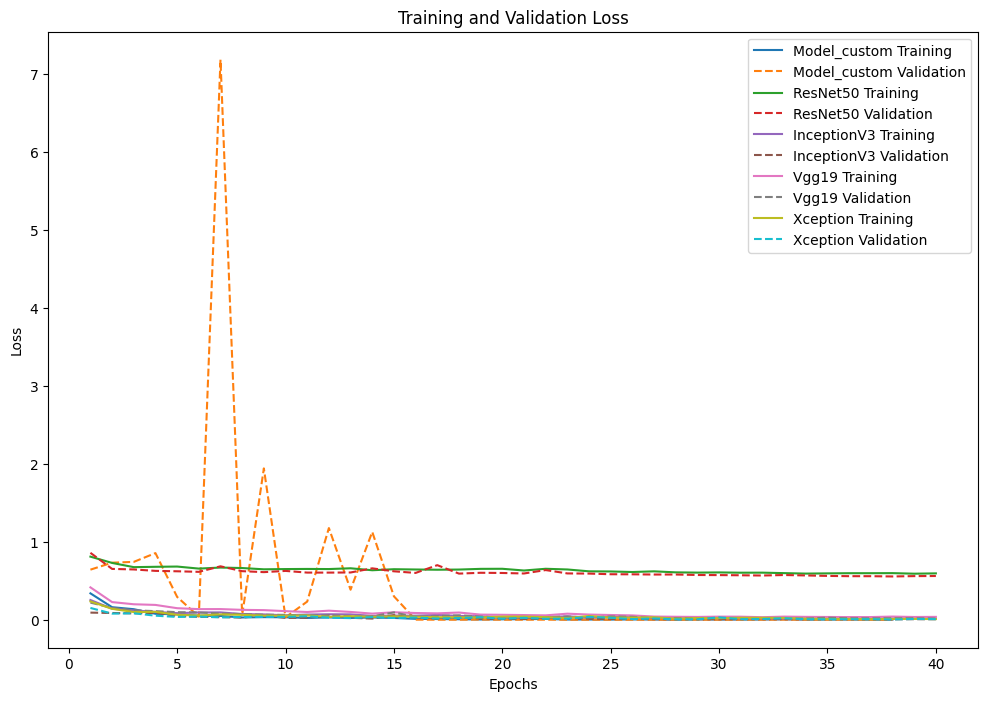

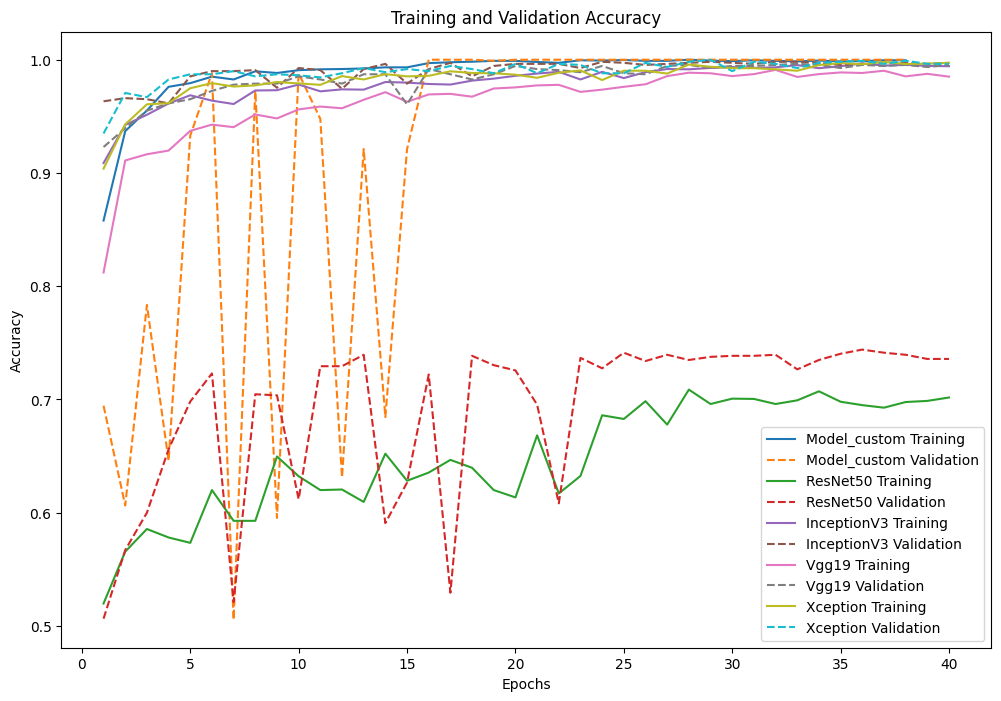

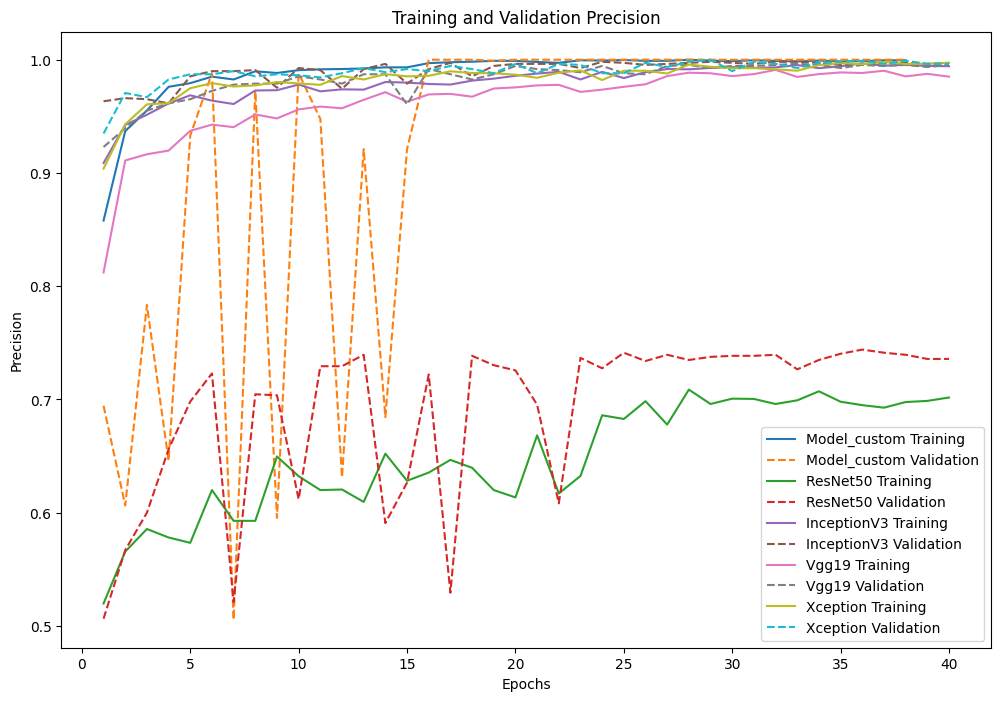

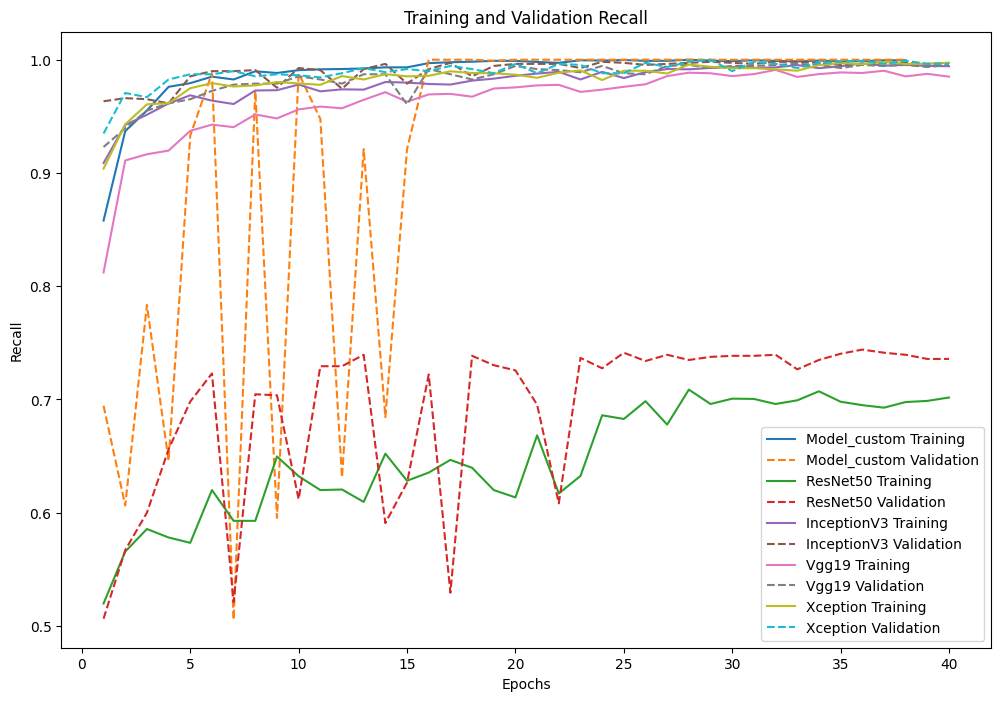

In [17]:
for metric in ['loss', 'accuracy', 'precision', 'recall']:
    plt.figure(figsize=(12, 8))
    for history, label in zip(all_histories, labels):
        epochs = range(1, len(history.history[metric]) + 1)
        plt.plot(epochs, history.history[metric], label=f'{label} Training')
        plt.plot(epochs, history.history[f'val_{metric}'], '--', label=f'{label} Validation')
    plt.title(f'Training and Validation {metric.title()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.title())
    plt.legend()
    plt.show()

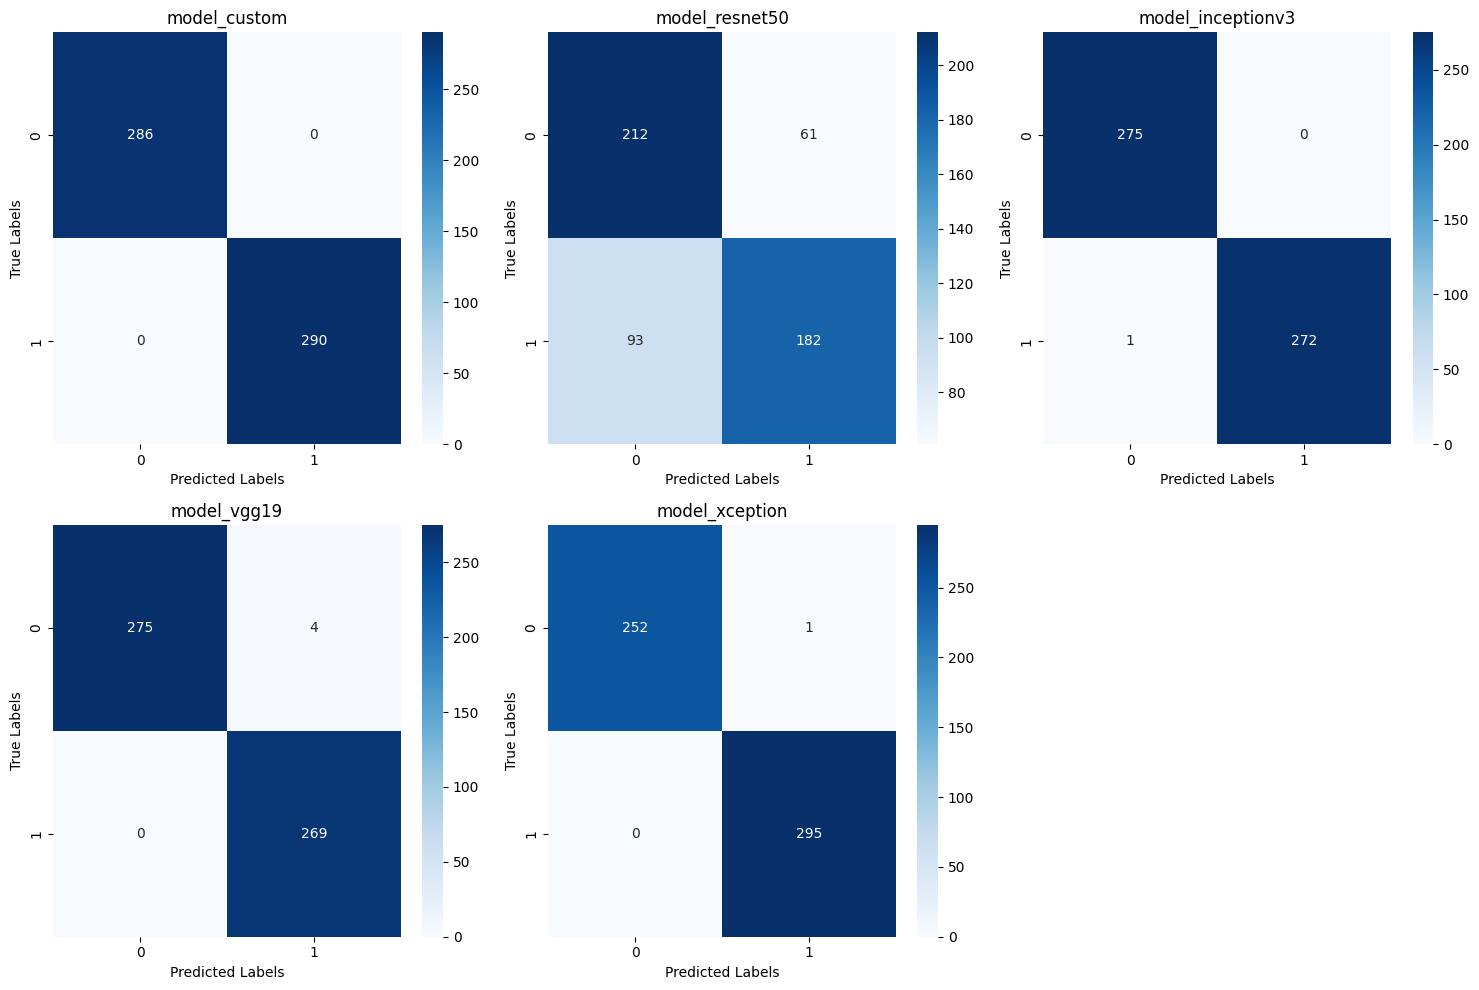

In [18]:
# 设置子图的行数和列数
n_rows = 2
n_cols = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

# 遍历每个模型结果，并在子图中绘制混淆矩阵
for i, (true_labels, predictions, model_name) in enumerate(model_results):
    predicted_labels = np.argmax(predictions, axis=1)
    cm = confusion_matrix(true_labels, predicted_labels)
    
    # 计算当前子图的位置
    row = i // n_cols
    col = i % n_cols
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[row, col])
    axes[row, col].set_title(model_name)
    axes[row, col].set_xlabel('Predicted Labels')
    axes[row, col].set_ylabel('True Labels')

# 隐藏剩余的子图（如果有的话）
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j // n_cols, j % n_cols])

plt.tight_layout()
plt.show()

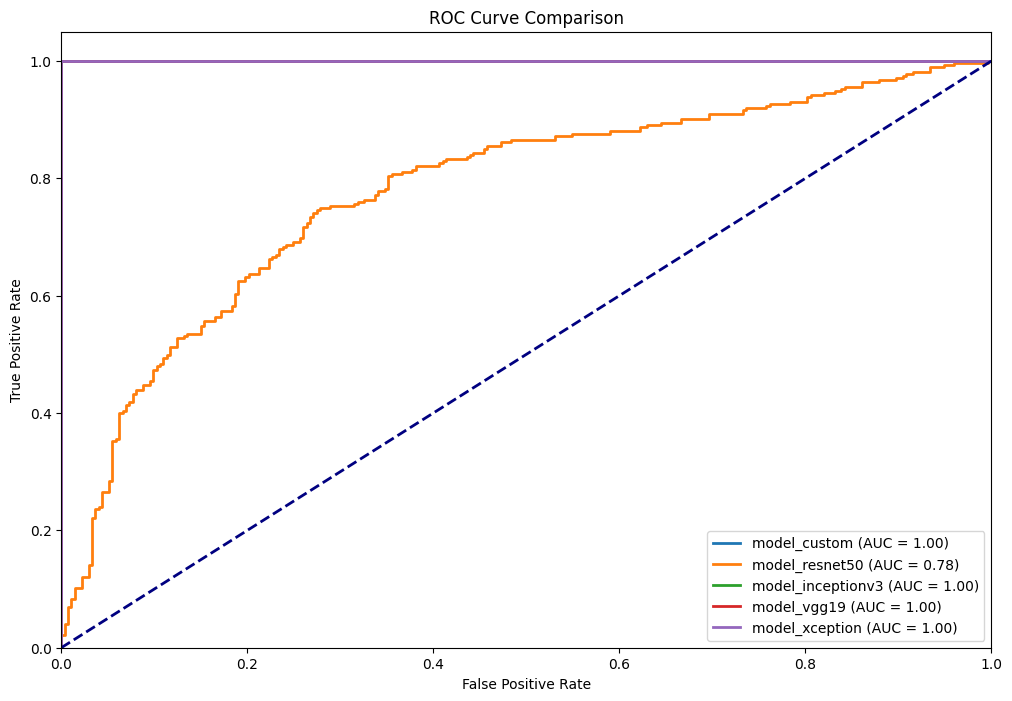

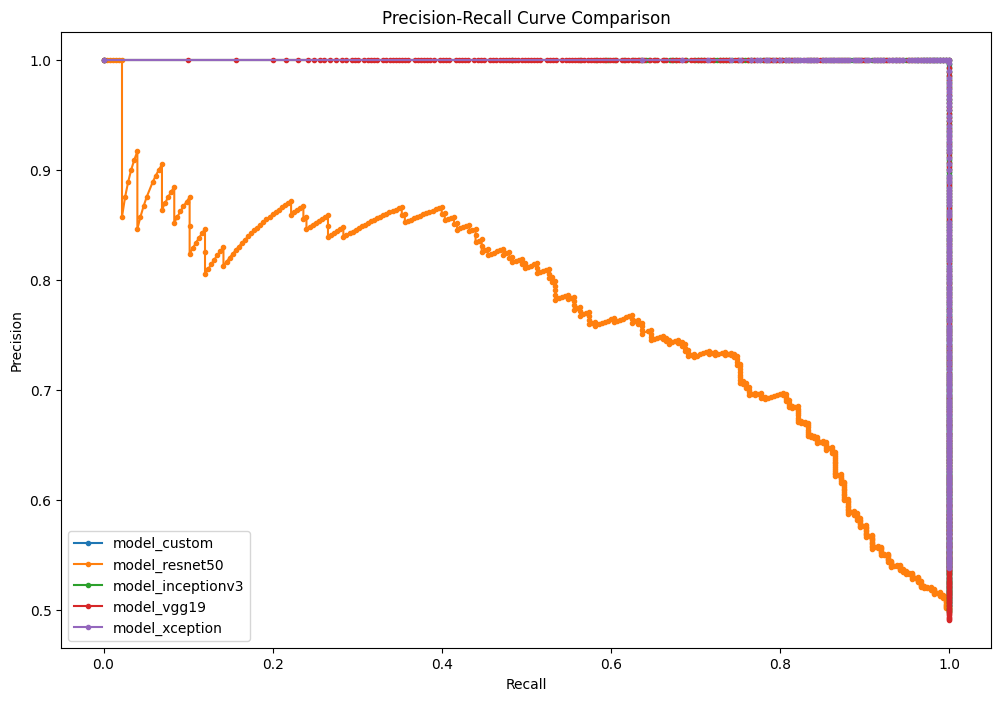

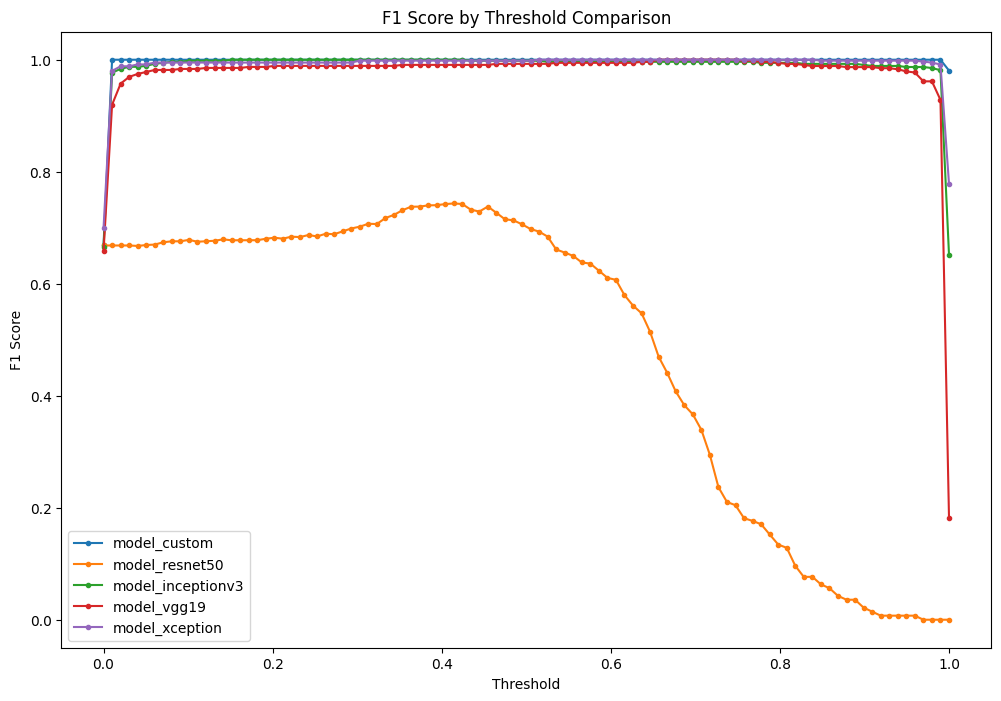

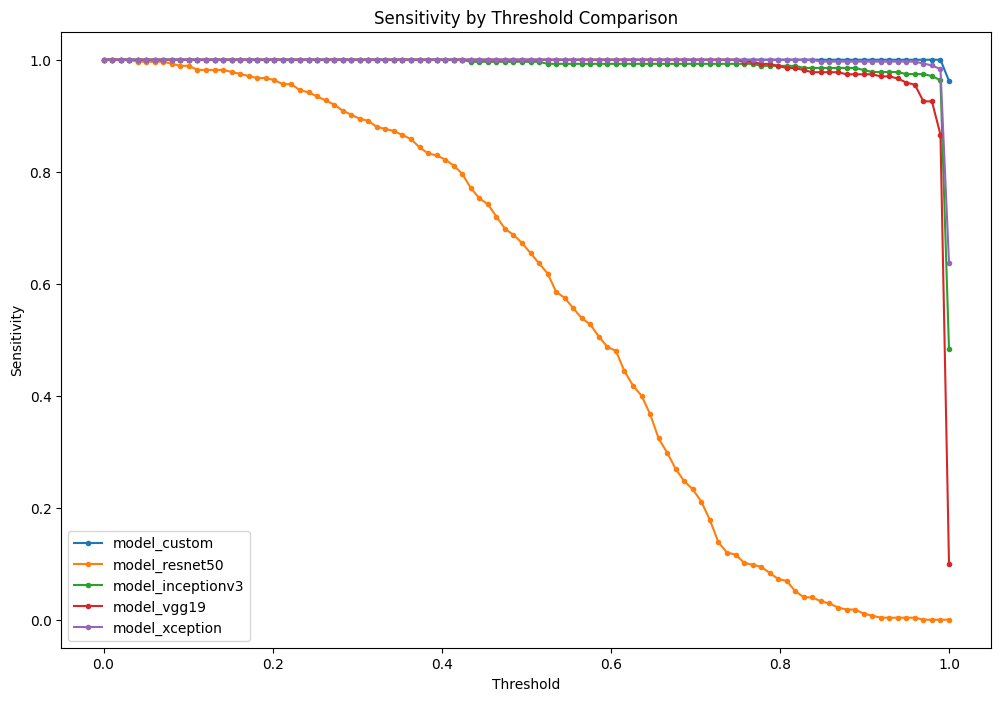

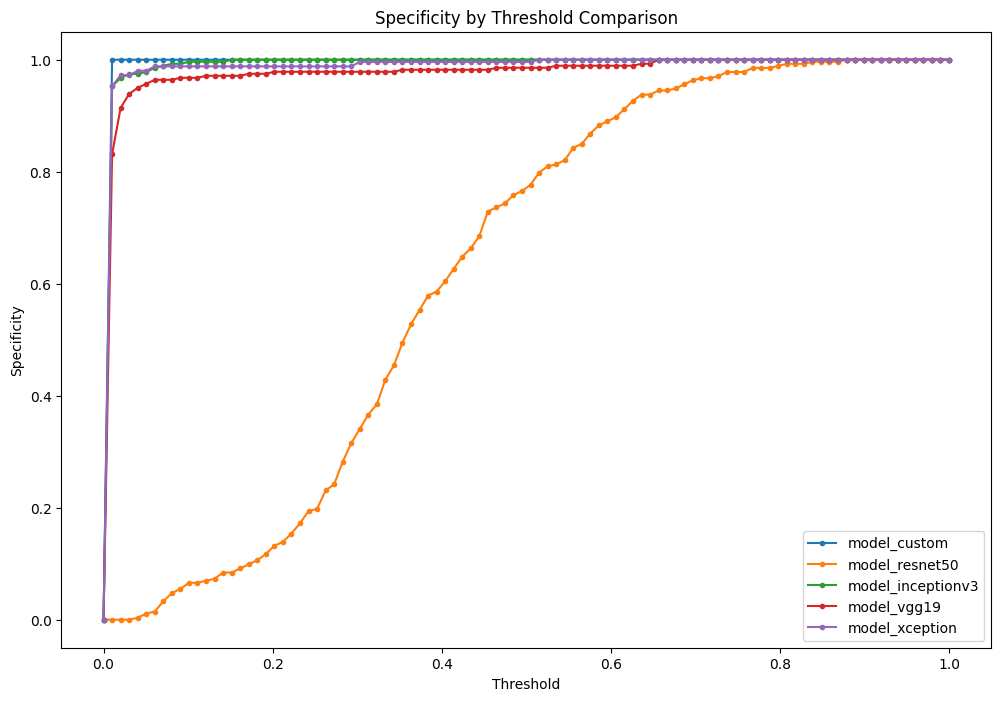

In [19]:
plt.figure(figsize=(12, 8))
for true_labels, predictions, model_name in model_results:
    fpr, tpr, _ = roc_curve(true_labels, predictions[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

plt.figure(figsize=(12, 8))
for true_labels, predictions, model_name in model_results:
    precision, recall, _ = precision_recall_curve(true_labels, predictions[:, 1])
    plt.plot(recall, precision, marker='.', label=model_name)
plt.title('Precision-Recall Curve Comparison')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

plt.figure(figsize=(12, 8))
for true_labels, predictions, model_name in model_results:
    thresholds = np.linspace(0, 1, 100)
    f1_scores = []
    for thresh in thresholds:
        predicted_labels_thresh = (predictions[:, 1] >= thresh).astype(int)
        f1 = f1_score(true_labels, predicted_labels_thresh)
        f1_scores.append(f1)
    plt.plot(thresholds, f1_scores, marker='.', label=model_name)
plt.title('F1 Score by Threshold Comparison')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.legend()
plt.show()

# 灵敏度曲线
plt.figure(figsize=(12, 8))
for true_labels, predictions, model_name in model_results:
    thresholds = np.linspace(0, 1, 100)
    sensitivity_scores = []
    for thresh in thresholds:
        predicted_labels_thresh = (predictions[:, 1] >= thresh).astype(int)
        tn, fp, fn, tp = confusion_matrix(true_labels, predicted_labels_thresh).ravel()
        sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
        sensitivity_scores.append(sensitivity)
    plt.plot(thresholds, sensitivity_scores, marker='.', label=model_name)
plt.title('Sensitivity by Threshold Comparison')
plt.xlabel('Threshold')
plt.ylabel('Sensitivity')
plt.legend()
plt.show()

# 特异性曲线
plt.figure(figsize=(12, 8))
for true_labels, predictions, model_name in model_results:
    thresholds = np.linspace(0, 1, 100)
    specificity_scores = []
    for thresh in thresholds:
        predicted_labels_thresh = (predictions[:, 1] >= thresh).astype(int)
        tn, fp, fn, tp = confusion_matrix(true_labels, predicted_labels_thresh).ravel()
        specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
        specificity_scores.append(specificity)
    plt.plot(thresholds, specificity_scores, marker='.', label=model_name)
plt.title('Specificity by Threshold Comparison')
plt.xlabel('Threshold')
plt.ylabel('Specificity')
plt.legend()
plt.show()